# 03 – Evaluation, Testing & Prediction

** Objectives**
- Load trained model and TF-IDF vectorizer
- Evaluate final performance
- Test on custom messages
- Build a reusable prediction function


In [1]:
import pandas as pd
import numpy as np
import joblib

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Load model, vectorizer, and test data


In [2]:
# Load trained model & vectorizer
model = joblib.load("../models/naive_bayes_model.joblib")
tfidf = joblib.load("../models/tfidf_vectorizer.joblib")

# Load processed data
df = pd.read_pickle("../data/processed.pkl")

print("Files loaded successfully")
df.head()


Files loaded successfully


,clean_message,label_num
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri wkli comp win fa cup final tkt st m...,1
3,u dun say earli hor u c alreadi say,0
4,nah dont think goe usf live around though,0


## Prepare test set


In [3]:
X = df['clean_message']
y = df['label_num']

# Use last 20% as test set (simple & safe)
split_index = int(0.8 * len(df))

X_test = X[split_index:]
y_test = y[split_index:]

X_test_tfidf = tfidf.transform(X_test)


## Final Model Evaluation


In [4]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy:", round(accuracy * 100, 2), "%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Final Accuracy: 98.12 %

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.98      0.87      0.92       145

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



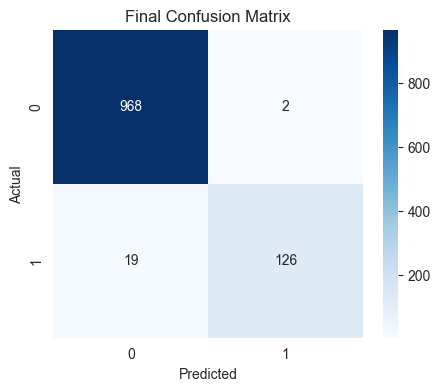

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Final Confusion Matrix")
plt.show()
